In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
data1 = pd.read_csv("eda4.csv", nrows = 1_000_000)
data2 = pd.read_csv("distance.csv", nrows = 1_000_000)

In [7]:
data1.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,...,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,...,2009,6,15,0,1,0,1,1,1,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,...,2010,1,5,0,1,0,2,1,1,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,...,2011,8,18,0,0,1,4,1,1,1
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,...,2012,4,21,0,0,1,6,0,1,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,...,2010,3,9,1,0,0,2,1,0,1


In [8]:
from geopy import distance
data1['distance'] = data1.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [5]:
# 모델: 랜덤 포레스트, 선형, 릿지, 라쏘, Xgboost

In [9]:
x = data1[['taxi_amount', 'distance']]
y = data1.fare_amount

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 5)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from matplotlib import pyplot as plt

In [22]:
linear = LinearRegression()
ridge = Ridge(alpha = 0.1)
lasso = Lasso(alpha = 0.1)

linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

linear_p = linear.predict(x)
ridge_p = ridge.predict(x)
lasso_p = lasso.predict(x)

y_pred_linear = linear.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

mse_lin_mul = mean_squared_error(y_test, y_pred_linear)
mse_rid_mul = mean_squared_error(y_test, y_pred_ridge)
mse_las_mul = mean_squared_error(y_test, y_pred_lasso)

#r2가 1에 가까운 값일수록 선형회귀 모델이 데이터에 대해 높은 연관성을 가지고 있다고 해석
r2_mul_linear = r2_score(y_pred_linear, y_test)
r2_mul_ridge = r2_score(y_pred_ridge, y_test)
r2_mul_lasso = r2_score(y_pred_lasso, y_test)


Accuracy: 43.50 (+/- 0.00)
Mean R^2: 0.14



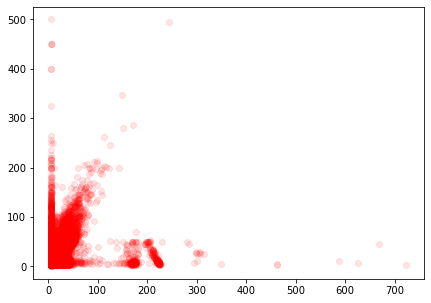

In [23]:
print("\nAccuracy: %0.2f (+/- %0.2f)" % (np.mean(mse_lin_mul), np.std(mse_lin_mul) * 2))
print("Mean R^2: %0.2f\n" % (np.mean(r2_mul_linear)))    

fig=plt.figure(figsize=(7, 5))
mulreg=fig.add_subplot(1,1,1)
mulreg.scatter(linear_p, y, color='r', alpha=0.1)


Accuracy: 43.50 (+/- 0.00)
Mean R^2: 0.14



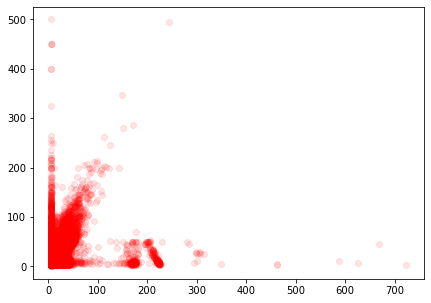

In [24]:
print("\nAccuracy: %0.2f (+/- %0.2f)" % (np.mean(mse_rid_mul), np.std(mse_rid_mul) * 2))
print("Mean R^2: %0.2f\n" % (np.mean(r2_mul_ridge)))    

fig=plt.figure(figsize=(7, 5))
mulreg=fig.add_subplot(1,1,1)
mulreg.scatter(ridge_p, y, color='r', alpha=0.1)


Accuracy: 43.51 (+/- 0.00)
Mean R^2: 0.13



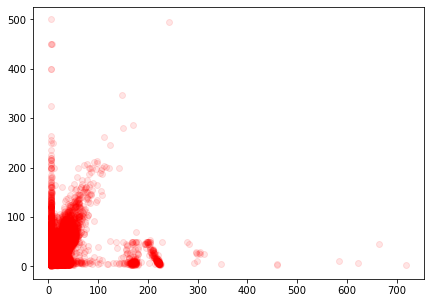

In [25]:
print("\nAccuracy: %0.2f (+/- %0.2f)" % (np.mean(mse_las_mul), np.std(mse_las_mul) * 2))
print("Mean R^2: %0.2f\n" % (np.mean(r2_mul_lasso)))    

fig=plt.figure(figsize=(7, 5))
mulreg=fig.add_subplot(1,1,1)
mulreg.scatter(lasso_p, y, color='r', alpha=0.1)

In [60]:
linear.score(X_test, y_test)

0.5444865633709606

In [61]:
y_pred = linear.predict(X_test)
r2 = 1 - ((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum()
print(r2)

0.5444865633709606


In [63]:
print(linear.coef_, linear.intercept_)

[0.13683476 2.7195829 ] 5.517762631013524


In [27]:
!pip install xgboost

In [51]:
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [30]:
test_df = pd.read_csv("test.csv")

In [34]:
data1.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'time', 'log_date', 'log_time',
       'log_hour', 'log_min', 'log_year', 'log_month', 'log_day', '7to15',
       '16to19', '20to6', 'dayofweek', 'weekday', 'is_extracharge',
       'taxi_amount', 'distance'],
      dtype='object')

In [42]:
data1 = data1.drop([ 'time', 'log_date', 'log_time'], axis=1)

In [43]:
data1.head()

,fare_amount,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,4.5,1,17,26,2009,6,15,0,1,0,1,1,1,1,0.639764
1,16.9,1,16,52,2010,1,5,0,1,0,2,1,1,1,5.246511
2,5.7,2,0,35,2011,8,18,0,0,1,4,1,1,1,0.863167
3,7.7,1,4,30,2012,4,21,0,0,1,6,0,1,1,1.737223
4,5.3,1,7,51,2010,3,9,1,0,0,2,1,0,1,1.241710


In [45]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [47]:
test_df = test_df.drop(['key', 'pickup_datetime'], axis=1)

In [48]:
sc = StandardScaler()
train_scaled = sc.fit_transform(data1)
test_scaled = sc.transform(test_df)

ValueError: X has 5 features, but this StandardScaler is expecting 15 features as input.

In [54]:
xg_reg = xgboost.XGBRegressor(n_estimators= 100)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [67]:
xg_mse = mean_squared_error(y_pred, y_test, squared=False)

In [68]:
xg_mse

6.595175346921166

In [66]:
y_pred

array([11.73442945,  6.73838866, 11.72071226, ..., 16.18608108,
        8.09964887, 11.43820143])

In [59]:
rnd_reg = RandomForestRegressor(n_estimators=200, max_depth=4, n_jobs=-1)
rnd_reg.fit(X_train, y_train)
y_pred_rnd = rnd_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rnd, squared=False)

In [69]:
mse

5.045282018155415